In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import Image

In [ ]:
class game_in_life:
  def __init__(self, weights, Ny = 15, Nx = 15, seed = 42):
    np.random.seed(seed)
    #self.ocean = np.random.randint(4, size=(Ny, Nx))
    self.ocean = np.random.choice(range(4), size=(Ny, Nx), p = weights)
    self.max_x = Nx-1
    self.max_y = Ny-1


  def running_window(self, window):
    empty = (window==0).sum()
    fish = (window==2).sum()
    shrimp = (window==3).sum()

    return empty, fish, shrimp

  def state(self):
    return self.ocean

  def epoch(self):
    tmp = self.ocean.copy()
    for i in range(self.max_y):
      for j in range(self.max_x):
        #stone
        if self.ocean[i,j] == 1:
          continue
          
        empty, fish, shrimp = self.running_window(self.ocean[max(i-1,0):min(i+2, self.max_y), max(j-1,0):min(j+2, self.max_x)])
        if self.ocean[i,j] == 0:
          empty -= 1
          if fish == 3:
            tmp[i,j] = 2
          elif shrimp == 3:
            tmp[i,j] = 3
          continue
        if self.ocean[i,j] == 2:
          fish -= 1
          if fish >= 4 or fish < 2:
            tmp[i,j] = 0 
        if self.ocean[i,j] == 3: 
          shrimp -= 1  
          if shrimp >= 4 or shrimp < 2:
            tmp[i,j] = 0

    self.ocean = tmp.copy()
    return self.ocean 

In [ ]:
x, y = 50, 50
seed = 42
#weights = [empty, stone, fish, shrimp]
weights = np.array([0.25, 0.15, 0.3, 0.3])
game = game_in_life(weights, x, y, seed)

In [ ]:
ocean = game.state()

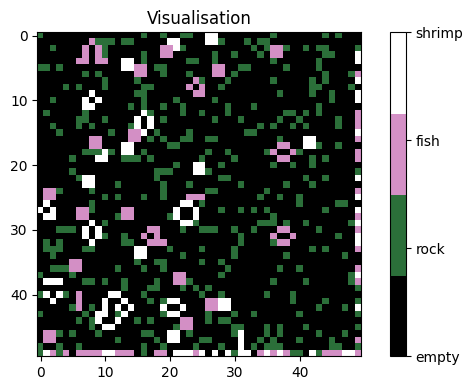

In [ ]:
rc('animation', html='html5')
fig = plt.figure(dpi=100);

im = plt.imshow(ocean, cmap=plt.cm.get_cmap('cubehelix', 4), animated=True)
plt.title('Visualisation')
cbar = fig.colorbar(im, ticks=range(4))
cbar.ax.set_yticklabels(['empty', 'rock', 'fish', 'shrimp'])

def init():
    global ocean
    game = game_in_life(weights, x, y, seed)
    ocean = game.state()
    im.set_data(ocean)
    return (im,)

def animate(i):
    global ocean
    im.set_data(ocean)
    game.epoch()
    ocean = game.state()
    return (im,)

ani = animation.FuncAnimation(
    fig,
    animate,
    frames=50,
    init_func=init,
    interval=200,
    blit=True
)

plt.tight_layout();
ani